## Licenciatura en Ciencia de Datos

### 02 Detección de Comunidades

Conceptos en redes sociales

Homophily. Nodos conectados entre ellos tienden a tener características similares.

Triadic. Si 2 individuos en una red social tienen un amigo en comun, es probable que eventualmente lleguen a estar conectados entre ellos.

Locality. Propiedad que indica que los nodos y las relaciones (aristas) tienden a formar grupos

**Community Detection**

Community Detection es un sinonimo de clustering. Es uno de los problemas fundamentales del análisis de redes sociales


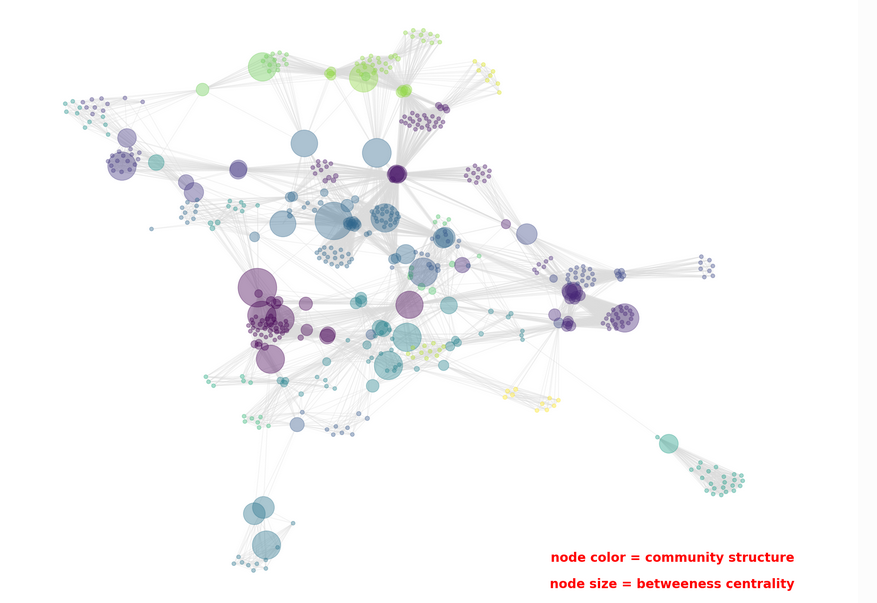

Podemos encontrar propiedades interesantes en los grafos. En grafos como redes sociales puede haber millones de nodos y aún más vínculos. En este tipo de grafos los nodos tienden a formar 'communities' (un pequeño conjunto de nodos con un inexplicable número grande de uniones entre ellos). Suele haber 'overlap' entre ellos. 

**Métodos para detectar comunidades**. Se han desarrollado diferentes enfoques para la partición de de grafos y una amplia gama de métodos han probado ser efectivos. A grandes rasgos podemos englogarlos 2 tipos de métodos

- Métodos Aglomerativos. Se inicia con un grafo sin relación y se van agregando relaciones (aristas) una a una.
- Métodos de División. Se inicia con el grafo original e iterativamente se van eliminando aristas iniciando con la arista de mayor relevancia.

Hemos visto medidas de centralidad para nodos. En este caso veremos una medida de centralidad para aristas. 

**Edge Betweenness Centrality (EBC)**

EBC es el número de caminos más cortos que pasa a través de una arista

$$EBC(e) =\sum_{s,t \in V} \frac{\sigma(s, t|e)}{\sigma(s, t)}$$
    


donde $V$ es el conjunto de todos los nodos, $\sigma(s, t)$ es el número de los $(s, t)$-caminos más cortos, y $\sigma(s, t|e)$ es el número de caminos que pasan a traves de la arista $e$ 

**Girvan-Newman Method**

El algoritmo Girvan Newman encuentra comunidades progresivamente eliminando relaciones del grafo original. Identifica la arista con mayor valor de betweenness y la elimina, los nodos conectados restantes forman comunidades. El algoritmo se enfoca en las relaciones que son más probables de formar comunidades.

Pasos del metodo GN

1. Encontrar la arista con mayor betweeenness (o múltiples aristas).
2. Recalcular el betweenness y nuevamente eliminar la arista con mayor valor. 
3. Repetir el proceso

Los nodos que quedan conectados después de la eliminación de relaciones se consideran comunidades. 

Este método funciona porque los grupos están separados unos de otros, revelando la estructura subyacente de la red.

**Ejemplo**. Así como el sencillo ejemplo de datos iris para aprendizaje supervisado, para redes sociales se tiene el ejemplo del club de karate. Se trata de 34 persondas de una universidad pertenecientes a un club de karate estudiados por Wayne Zachary en los años 70s. Las relaciones en esta red indican amistad.

In [3]:
# Importar Librerías

import pandas as pd
import numpy as np
import networkx as nx


In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Definir el grafo

In [5]:
G_karate = nx.karate_club_graph()

Nodos y relaciones

In [6]:
print(G_karate.nodes())
print(G_karate.edges())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


In [72]:
#G.nodes[5]['club']
G_karate.nodes[31]['club']

'Officer'

Obtener el número de nodos y relaciones

In [8]:
print(G_karate.number_of_nodes())
print(G_karate.number_of_edges())

34
78


Visualizar el grafo

/home/leonardo/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


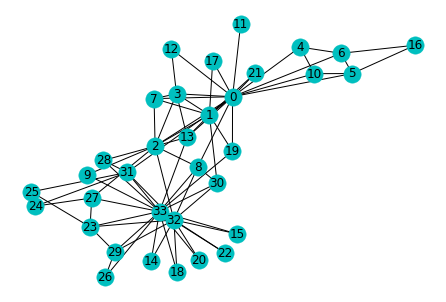

In [9]:
nx.draw(G_karate,node_color='c',edge_color='k', with_labels=True)

Repasando lo visto la nota anterior. calculemos las medidas de centralidad de los nodos

In [13]:
degree = nx.degree_centrality(G_karate)
betweenness = nx.betweenness_centrality(G_karate)
pagerank = nx.pagerank(G_karate)

print ("Los nodos con mayor relevancia para cada medida son:")
print ("Degree: ", sorted(degree.items(), key=lambda x: x[1], reverse = True)[:3])
print ("Betweenness: ", sorted(betweenness.items(), key=lambda x: x[1], reverse = True)[:3])
print ("PageRank: ", sorted(pagerank.items(), key=lambda x: x[1], reverse = True)[:3])

Los nodos con mayor relevancia para cada medida son:
Degree:  [(33, 0.5151515151515151), (0, 0.48484848484848486), (32, 0.36363636363636365)]
Betweenness:  [(0, 0.43763528138528146), (33, 0.30407497594997596), (32, 0.145247113997114)]
PageRank:  [(33, 0.1009179167487121), (0, 0.09700181758983709), (32, 0.07169213006588289)]


Grafiquemos nuevamente utilizando alguna medida de centralidad como modificador el tamaño de los nodos

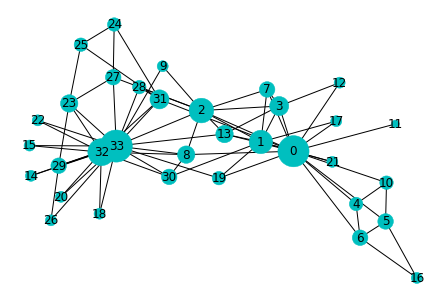

In [27]:
size = [x * 2000 for x in degree.values()]
nx.draw(G_karate,node_color='c',edge_color='k', with_labels=True, node_size = size)

El algoritmo GN calcula el betweenness para las aristan en lugar de nodos para determinar las relacionesse se deben ir eliminando.

In [33]:
betweenness_edges = nx.edge_betweenness_centrality(G_karate)
print ("La relación con mayor betweenness es entre los nodos: ", sorted(betweenness_edges.items(), key=lambda x: x[1], reverse = True)[:3])

La relación con mayor betweenness es entre los nodos:  [((0, 31), 0.1272599949070537), ((0, 6), 0.07813428401663695), ((0, 5), 0.07813428401663694)]


**Ejercicio**. revisar la ayuda de la función y explicar que hace el parámetro 'normalized'.

El algoritmo GN está implementado en la siguiente paquetería

In [34]:
import networkx.algorithms.community as nxcom

In [38]:
GN = nxcom.girvan_newman(G_karate)
communities = next(GN)


Los elementos de cada comunidad son

In [39]:
communities

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

El algorítmo hizo la separación del grafo en 2 comunidades 

In [40]:
len(communities)

2

Graficar agregando el color por comunidad

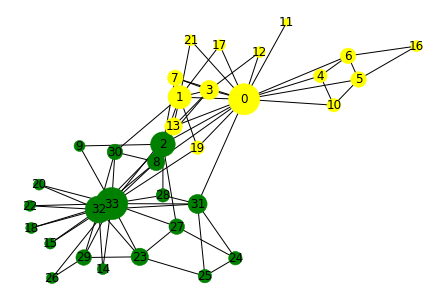

In [76]:
# Asignar color a las comunidades
community_index = {n: i for i, com in enumerate(communities) for n in com}
color = [community_index[n] for n in G_karate.nodes()]
color_nombre = ['yellow' if n == 0 else 'green' for n in color]

#Graficar
nx.draw(G_karate,node_color=color_nombre,edge_color='k', with_labels=True, node_size = size)

Ahora, si comparamos respecto a lo que se conoce del estudio que tenemos de esta red tenemos lo siguiente. Hubo una disputa entre 2 miembros de la red, el Presidente del Club (nodo 34) y el Instructor (nodo 1) lo que guió al club a separarse en 2. 

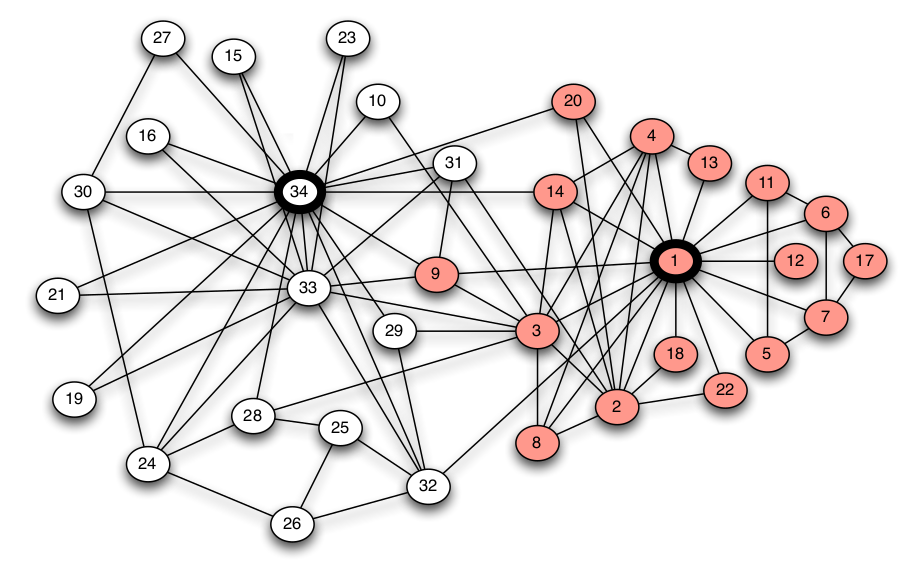

Notar que los índices en python inician en cero, por tanto el nodo cero de la red del ejemplo corresponde al nodo uno de la red mostrada previamente.

Se puede saber a que grupo pertenecen realmente cada nodo

In [77]:
G_karate.nodes[0]['club']

'Mr. Hi'

In [78]:
G_karate.nodes[33]['club']

'Officer'

In [79]:
G_karate.nodes[8]['club']

'Mr. Hi'

Es un área que continúa en investigación ...